# Experimentos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../model')
import pickle
from export.dumper import import_models
import matplotlib.pyplot as plt

models_dict = import_models('../data/models.pkl')
graphics = import_models('../data/graphics.pkl')

for contract, signatures in models_dict.items():
    for signature, datos_modelo in signatures.items():
        datos_modelo['X_test'].drop(['block_timestamp'], axis=1, inplace=True)

for contract, signatures in graphics.items():
    for signature, datos_modelo in signatures.items():
        if datos_modelo:
            datos_modelo['X_text'].drop(['block_timestamp'], axis=1, inplace=True)

In [2]:
def print_model(contract, signature):

    modelo = models_dict[contract][signature]
    graphic = graphics[contract][signature]
    
    fig, ax = plt.subplots(figsize=(6, 6))

    y_true = graphic['y_test']
    y_pred_gb = modelo['GradientBoost'].model.predict(graphic['X_text'])

    min_val = min(y_true.min(), y_pred_gb.min())
    max_val = max(y_true.max(), y_pred_gb.max())

    range_val = max_val - min_val
    margin = range_val * 0.05  # margen del 5% del rango total
    min_val -= margin
    max_val += margin
    
    hb = ax.hexbin(y_true, y_pred_gb, gridsize=25, cmap='cool', mincnt=1)
    ax.plot([min_val, max_val], [min_val, max_val], 'k--')  # Línea de identidad
    ax.set_xlabel('Valores reales')
    ax.set_ylabel('Predicciones')
    #ax.set_title('Predicción con Gradient Boost')
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)
    ax.set_aspect('equal', 'box')
    cb = fig.colorbar(hb, ax=ax, pad=0.075, fraction=0.075, aspect=10)
    cb.set_label('Frecuencia')

    plt.tight_layout()
    plt.show()

def print_model_input_len(modelo):
    import matplotlib.pyplot as plt
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    y_true = modelo['y_test']
    y_pred_gb = modelo['GradientBoost'].model.predict(modelo['X_test'])

    min_val = min(y_true.min(), y_pred_gb.min())
    max_val = max(y_true.max(), y_pred_gb.max())

    range_val = max_val - min_val
    margin = range_val * 0.05
    min_val -= margin
    max_val += margin

    hb1 = ax1.hexbin(y_true, y_pred_gb, gridsize=30, cmap='cool', mincnt=1)
    ax1.plot([min_val, max_val], [min_val, max_val], 'k--')
    ax1.set_xlabel('Valores reales')
    ax1.set_ylabel('Predicción de Gas')
    ax1.set_title('Predicción de Gas vs Valores Reales')
    ax1.set_xlim(min_val, max_val)
    ax1.set_ylim(min_val, max_val)
    cb1 = fig.colorbar(hb1, ax=ax1)

    input_len = modelo['X_test']['input_len']
    hb2 = ax2.hexbin(input_len, y_pred_gb, gridsize=30, cmap='cool', mincnt=1)
    ax2.set_xlabel('Longitud de entrada')
    ax2.set_ylabel('Predicción de Gas')
    ax2.set_title('Predicción de Gas vs Longitud de Entrada')
    cb2 = fig.colorbar(hb2, ax=ax2)

    plt.tight_layout()
    plt.show()

## Evaluación

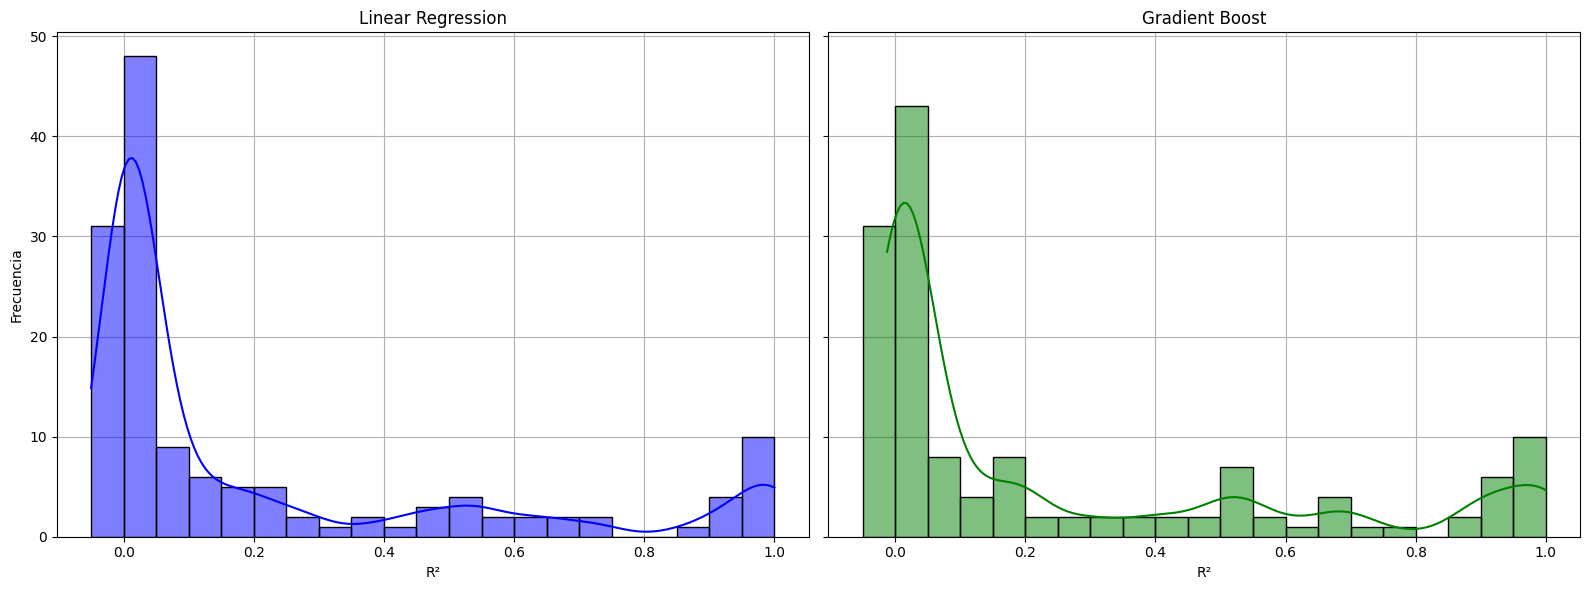

In [3]:
import seaborn as sns

r2_values_linear = list()
r2_values_gradient = list()

for contract, signatures in models_dict.items():
    for signature, datos_modelo in signatures.items():
        if datos_modelo['size'] < 10000: continue
        r2_values_gradient.append(datos_modelo['GradientBoost'].r2)  
        r2_values_linear.append(datos_modelo['LinearRegression'].r2)  

r2_values_linear = [-0.05 if x < -0.05 else x for x in r2_values_linear]
r2_values_gradient = [-0.05 if x < -0.05 else x for x in r2_values_gradient]
        
bins = np.arange(-0.05, 1.05, 0.05)
# Crear la figura y los ejes
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)  # Dos gráficos en una columna

sns.histplot(r2_values_linear, bins=bins, kde=True, ax=axs[0], color='blue', edgecolor='black', kde_kws={"bw_adjust": 0.35})
axs[0].set_title('Linear Regression')
axs[0].set_xlabel('R²')
axs[0].set_ylabel('Frecuencia')
axs[0].set_axisbelow(True)
axs[0].grid(True)

sns.histplot(r2_values_gradient, bins=bins, kde=True, ax=axs[1], color='green', edgecolor='black', kde_kws={"bw_adjust": 0.35})
axs[1].set_title('Gradient Boost')
axs[1].set_xlabel('R²')
axs[1].set_axisbelow(True)
axs[1].grid(True)

# Ajustar el layout y mostrar los gráficos
plt.tight_layout()
#plt.savefig('../memory/img/resultados_r2.pdf')
plt.show()

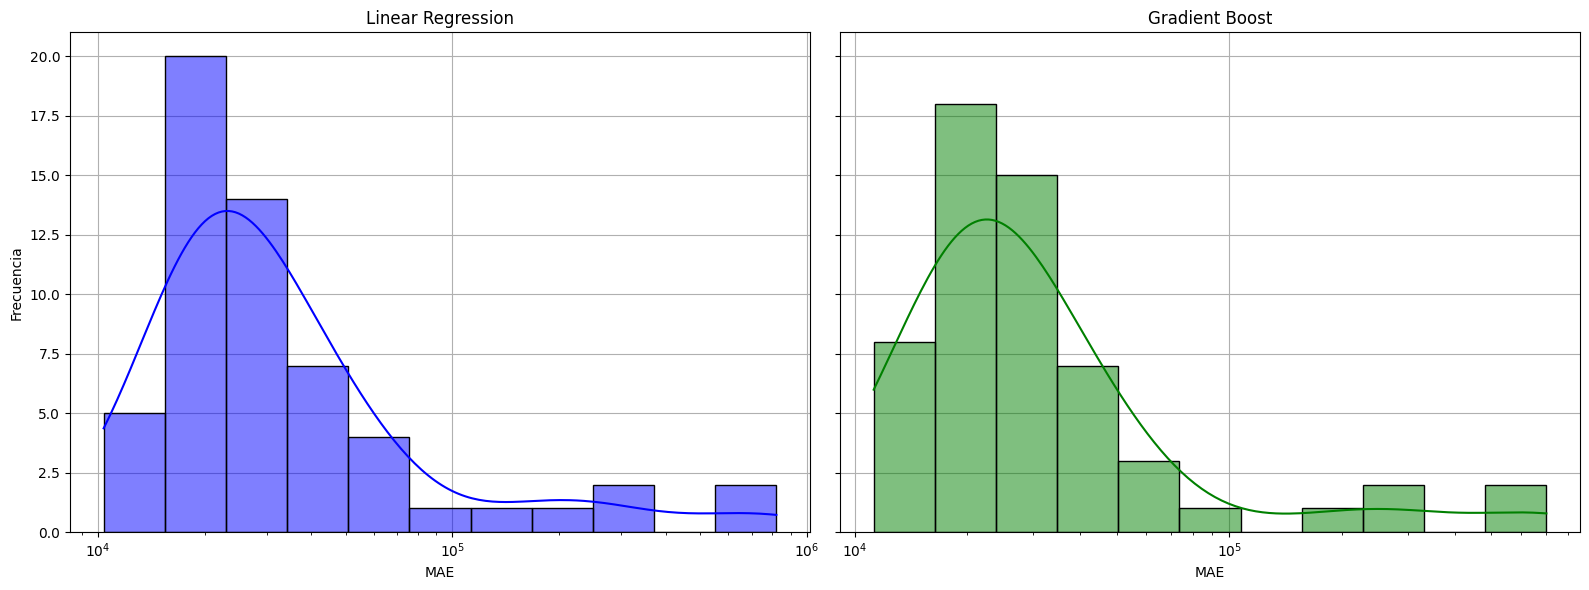

In [4]:
import seaborn as sns

mae_values_linear = list()
mae_values_gradient = list()

for contract, signatures in models_dict.items():
    for signature, datos_modelo in signatures.items():
        if datos_modelo['size'] < 10000: continue
        mae_values_gradient.append(datos_modelo['GradientBoost'].mae)  
        mae_values_linear.append(datos_modelo['LinearRegression'].mae)

mae_values_linear = list(filter(lambda x: x > 10000, mae_values_linear))
mae_values_gradient = list(filter(lambda x: x > 10000, mae_values_gradient))
# Crear la figura y los ejes
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)  # Dos gráficos en una columna

sns.histplot(mae_values_linear, ax=axs[0], kde=True, color='blue', edgecolor='black', log_scale=True)
axs[0].set_title('Linear Regression')
axs[0].set_xlabel('MAE')
axs[0].set_ylabel('Frecuencia')
axs[0].set_axisbelow(True)
axs[0].grid(True)

sns.histplot(mae_values_gradient, ax=axs[1], kde=True, color='green', edgecolor='black', log_scale=True)
axs[1].set_title('Gradient Boost')
axs[1].set_xlabel('MAE')
axs[1].set_axisbelow(True)
axs[1].grid(True)

plt.tight_layout()
#plt.savefig('../memory/img/mae_mayor_10000.pdf')
plt.show()

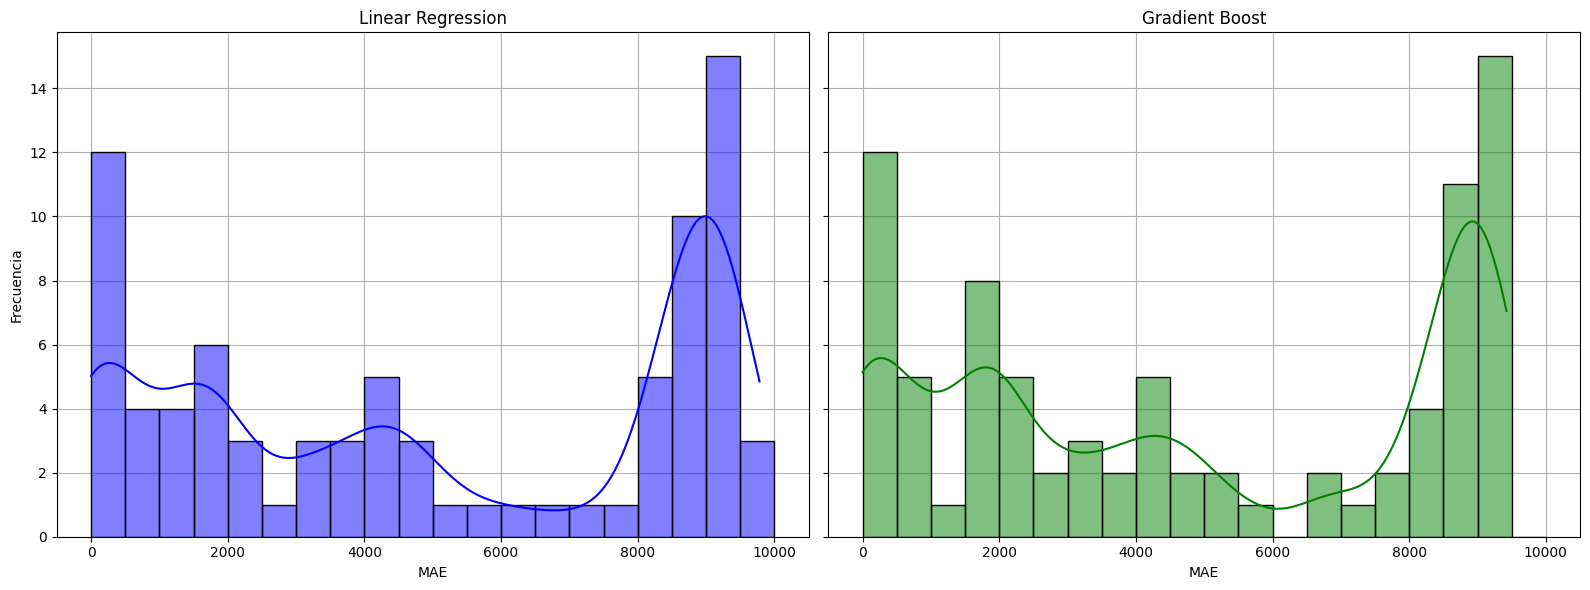

In [5]:
import seaborn as sns

mae_values_linear = list()
mae_values_gradient = list()

for contract, signatures in models_dict.items():
    for signature, datos_modelo in signatures.items():
        if datos_modelo['size'] < 10000: continue
        mae_values_gradient.append(datos_modelo['GradientBoost'].mae)  
        mae_values_linear.append(datos_modelo['LinearRegression'].mae)

mae_values_linear = list(filter(lambda x: x <= 10000, mae_values_linear))
mae_values_gradient = list(filter(lambda x: x <=10000, mae_values_gradient))

bins =np.arange(0, 10001, 500)
# Crear la figura y los ejes
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)  # Dos gráficos en una columna

sns.histplot(mae_values_linear, bins=bins, ax=axs[0], kde=True, color='blue', edgecolor='black', kde_kws={"bw_adjust": 0.35})
axs[0].set_title('Linear Regression')
axs[0].set_xlabel('MAE')
axs[0].set_ylabel('Frecuencia')
axs[0].set_axisbelow(True)
axs[0].grid(True)

sns.histplot(mae_values_gradient, bins=bins, ax=axs[1], kde=True, color='green', edgecolor='black', kde_kws={"bw_adjust": 0.35})
axs[1].set_title('Gradient Boost')
axs[1].set_xlabel('MAE')
axs[1].set_axisbelow(True)
axs[1].grid(True)

plt.tight_layout()
#plt.savefig('../memory/img/mae_menor_10000.pdf')
plt.show()

## Experimentos

In [6]:
SIGNATURES_ERC20 = {
    '0x095ea7b3': 'approve',
    '0xa9059cbb': 'transfer',
    '0x23b872dd': 'transferFrom',
    '0xd505accf': 'permit',
    '0x42966c68': 'burn',
    '0x79cc6790': 'burnFrom',
    '0x40c10f19': 'mint',
    '0xa457c2d7': 'decreaseAllowance',
    '0x39509351': 'increaseAllowance',
    '0x2f4f21e2': 'depositFor',
    '0x205c2878': 'withdrawTo'
}

In [7]:
n_signatures = n_erc20_signatures = erc20_great_values = 0
_signatures_erc20 = set()
r2_values = list()
r2_values_erc20 = list()
_set = set()

for contract, signatures in models_dict.items():
    for signature, datos_modelo in signatures.items():
        if datos_modelo['size'] < 10000: continue
        n_signatures += 1

        if datos_modelo['GradientBoost'].r2 > 0.8:
            _set.add((contract, signature))
        
        if str(signature).lower() in SIGNATURES_ERC20.keys():
            n_erc20_signatures += 1
            r2_values_erc20.append(datos_modelo['GradientBoost'].r2)  

            if datos_modelo['GradientBoost'].r2 > 0.8:
                erc20_great_values += 1
                _signatures_erc20.add(contract + '-' + signature)

print(f'Nº total de signaturas: {n_signatures}')
print(f'Nº de signaturas que pertenecen a la interfaz del ERC20: {n_erc20_signatures}')
print(f'Nº de signaturas de ERC20 con r2 > 0.8: {erc20_great_values}')
print(_signatures_erc20)

Nº total de signaturas: 140
Nº de signaturas que pertenecen a la interfaz del ERC20: 41
Nº de signaturas de ERC20 con r2 > 0.8: 1
{'0xdac17f958d2ee523a2206206994597c13d831ec7-0x095ea7b3'}


['0x3db52ce065f728011ac6732222270b3f2360d919']['0x0c4dd810']


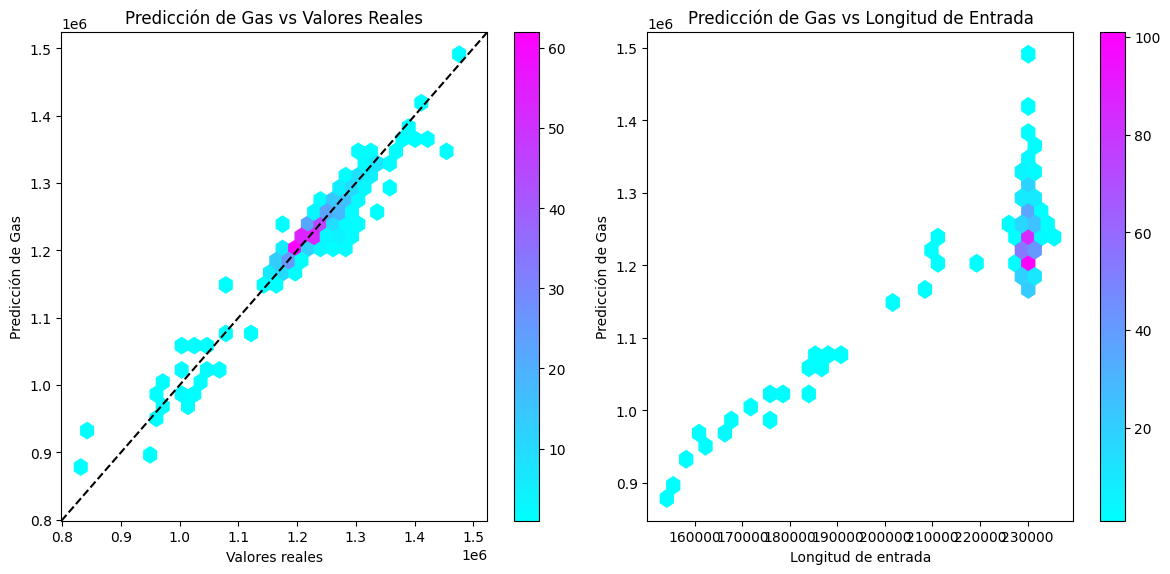

R2 = 0.9203
Pesos:
	input_len: 0.617781
	(uint64,bytes32,uint64,uint256,bytes32,bytes32,uint256,bytes32)_: 0.000133
	(uint64,uint64,uint64,bytes32,uint256,bytes32,bytes32,bytes,bytes,bytes,bytes[],bytes[])[]__newBlocksData: 0.382085
-------------------------------------------------------------------
['0xd19d4b5d358258f05d7b411e21a1460d11b0876f']['0x4165d6dd']


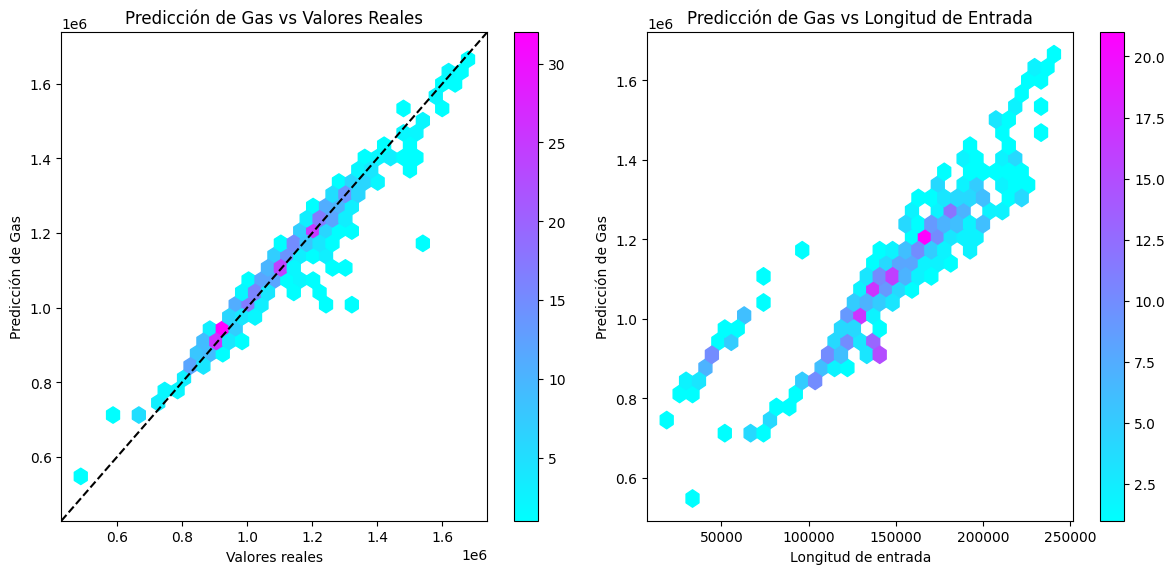

R2 = 0.9462
Pesos:
	input_len: 0.886972
	(bytes32,uint32,bytes[],bytes32[],bytes,uint16[])[]__blocksData: 0.079224
	bytes__proof: 0.025872
	uint256__proofType: 0.000000
	_proofType_iszero: 0.007885
	bytes32__parentStateRootHash: 0.000047
-------------------------------------------------------------------
['0x4dbd4fc535ac27206064b68ffcf827b0a60bab3f']['0x439370b1']


/var/folders/43/zsmflvb9035gk7qdlzjbrcqr0000gn/T/ipykernel_80735/4091136421.py:54: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax1.set_xlim(min_val, max_val)
/var/folders/43/zsmflvb9035gk7qdlzjbrcqr0000gn/T/ipykernel_80735/4091136421.py:55: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax1.set_ylim(min_val, max_val)


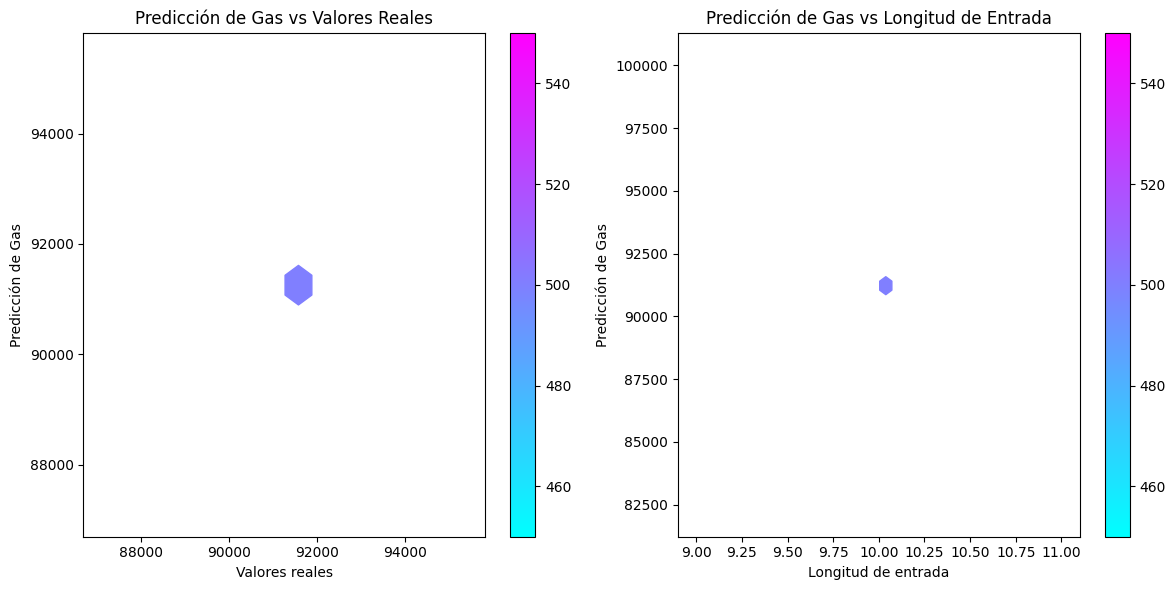

R2 = 1.0000
Pesos:
	input_len: 0.000000
-------------------------------------------------------------------
['0xd37bbe5744d730a1d98d8dc97c42f0ca46ad7146']['0x44bc937b']


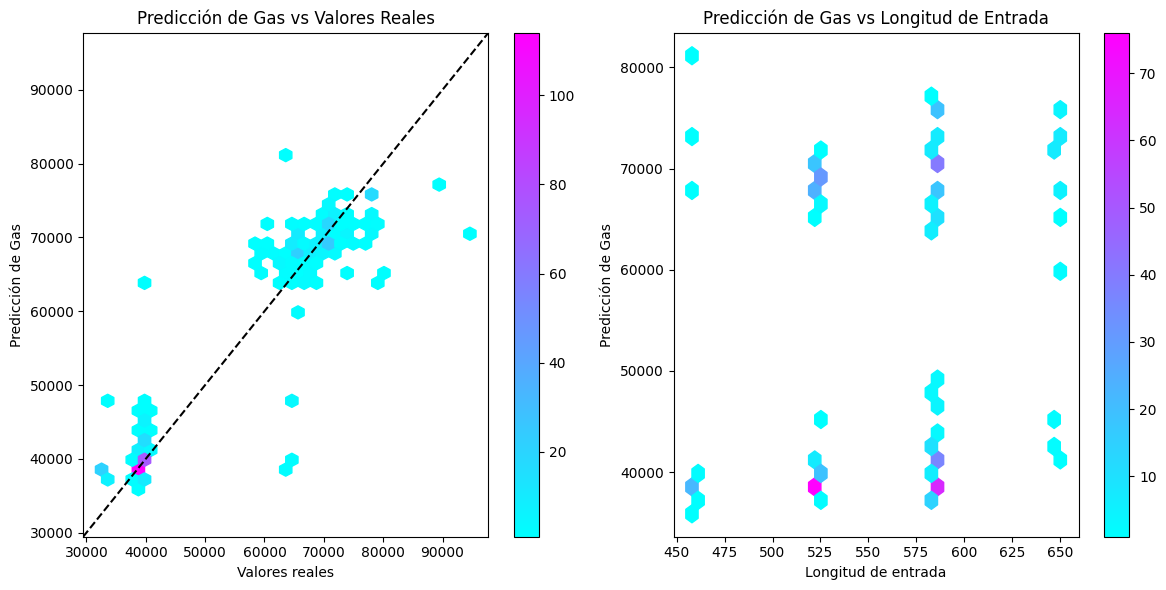

R2 = 0.9112
Pesos:
	input_len: 0.000470
	uint256_amount: 0.893431
	amount_iszero: 0.016145
	string_memo: 0.088932
	uint256_expiration: 0.001022
	expiration_iszero: 0.000000
-------------------------------------------------------------------
['0x00000000000001ad428e4906ae43d8f9852d0dd6']['0xfd9f1e10']


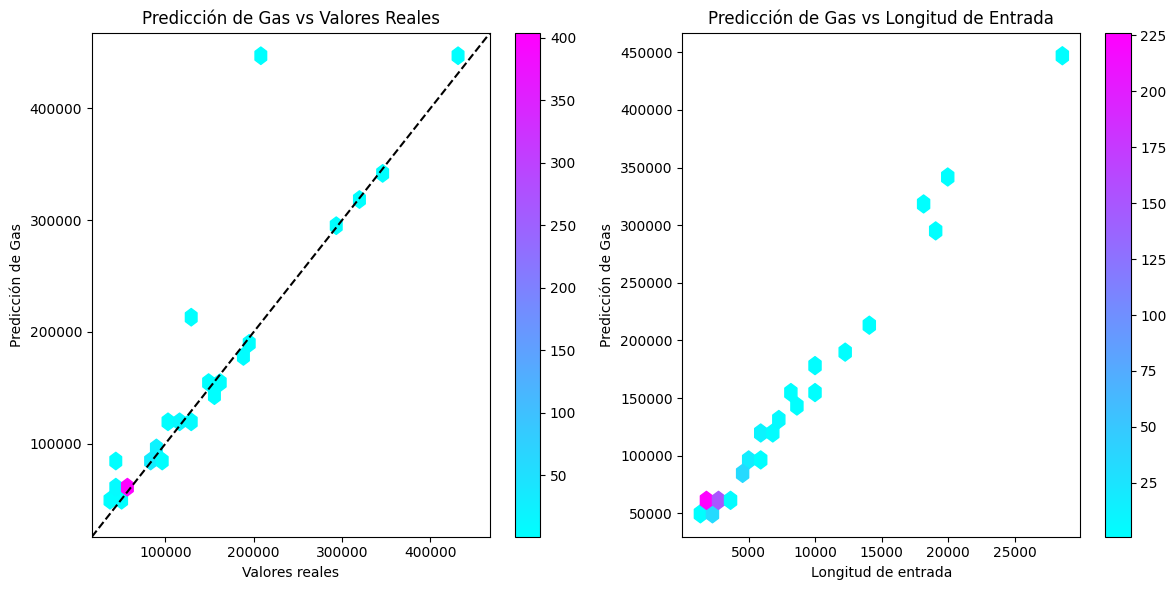

R2 = 0.9508
Pesos:
	input_len: 1.000000
	(address,address,(uint8,address,uint256,uint256,uint256),(uint8,address,uint256,uint256,uint256,address),uint8,uint256,uint256,bytes32,uint256,bytes32,uint256)[]_orders: 0.000000
-------------------------------------------------------------------
['0x5e4e65926ba27467555eb562121fac00d24e9dd2']['0xd0f89344']


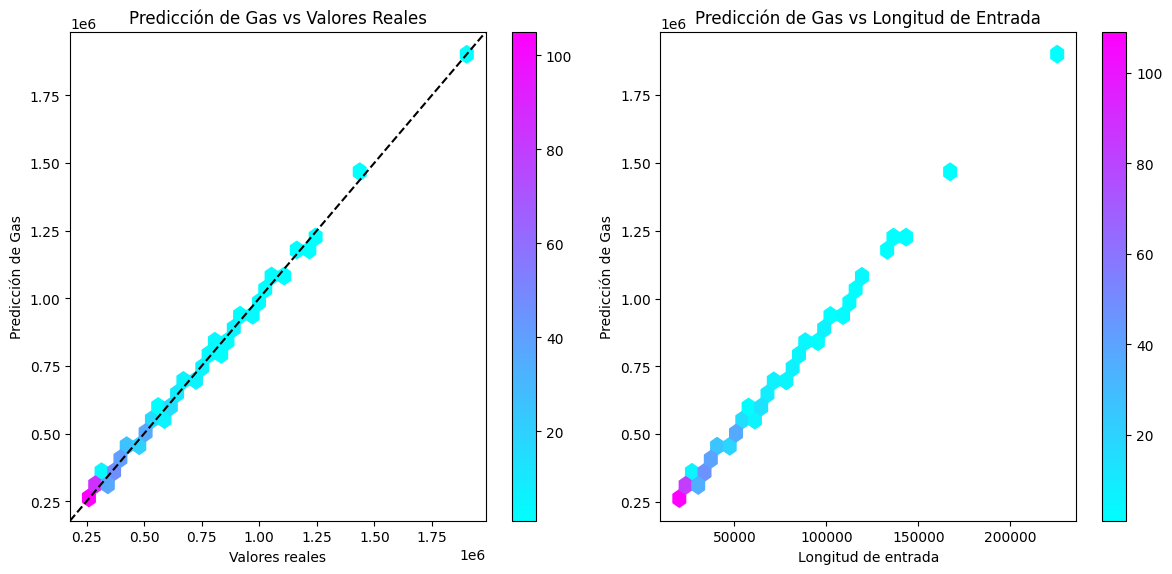

R2 = 0.9998
Pesos:
	input_len: 1.000000
-------------------------------------------------------------------
['0x388c818ca8b9251b393131c08a736a67ccb19297']['0x']


/var/folders/43/zsmflvb9035gk7qdlzjbrcqr0000gn/T/ipykernel_80735/4091136421.py:54: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax1.set_xlim(min_val, max_val)
/var/folders/43/zsmflvb9035gk7qdlzjbrcqr0000gn/T/ipykernel_80735/4091136421.py:55: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax1.set_ylim(min_val, max_val)


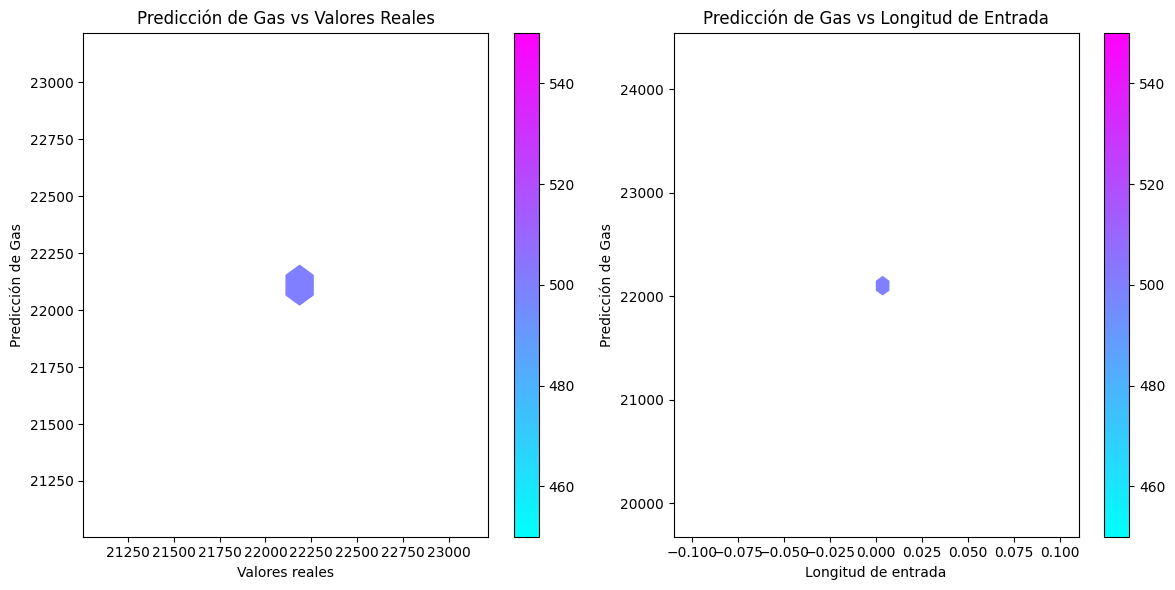

R2 = 1.0000
Pesos:
	input_len: 0.000000
-------------------------------------------------------------------
['0xc36442b4a4522e871399cd717abdd847ab11fe88']['0xac9650d8']


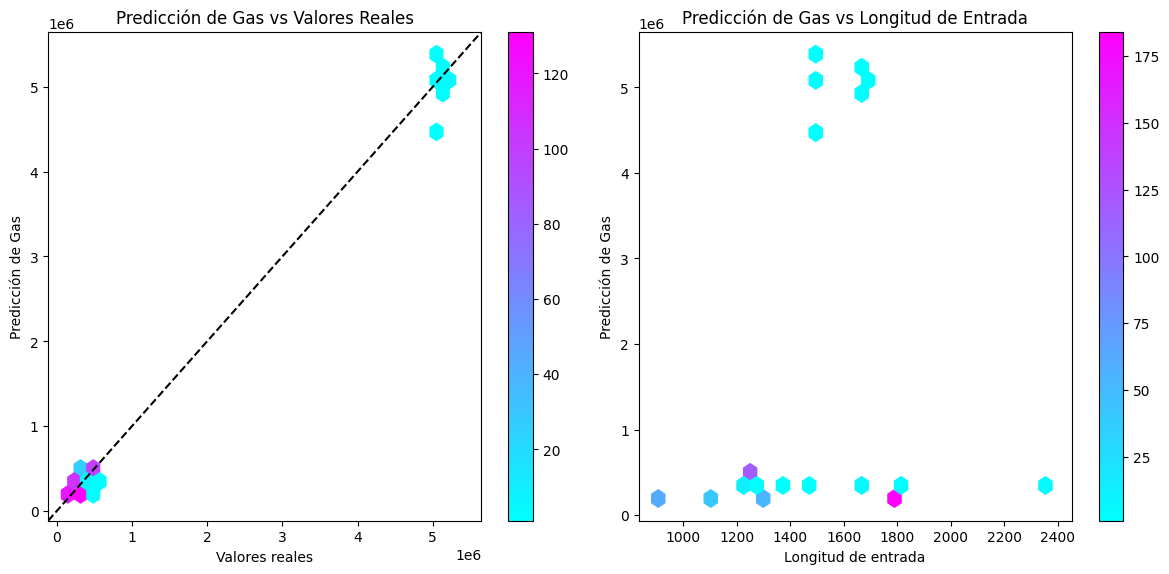

R2 = 0.9029
Pesos:
	input_len: 0.422829
	bytes[]_data: 0.577171
-------------------------------------------------------------------
['0x00000000000000adc04c56bf30ac9d3c0aaf14dc']['0xf2d12b12']


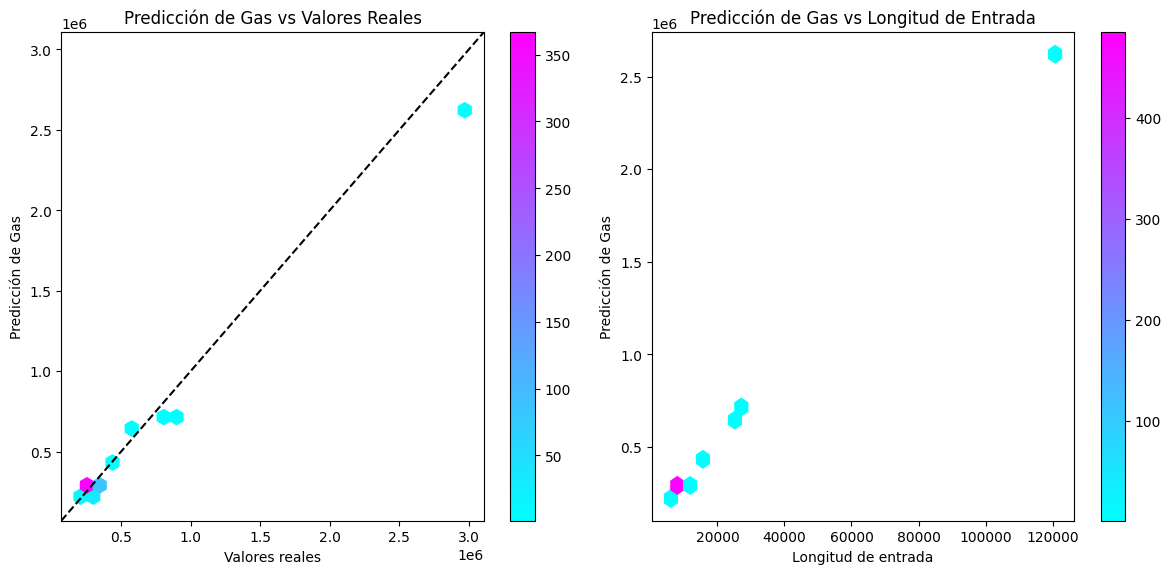

R2 = 0.9079
Pesos:
	input_len: 0.999831
	((address,address,(uint8,address,uint256,uint256,uint256),(uint8,address,uint256,uint256,uint256,address),uint8,uint256,uint256,bytes32,uint256,bytes32,uint256),uint120,uint120,bytes,bytes)[]_: 0.000001
	(uint256,uint8,uint256,uint256,bytes32[])[]_: 0.000108
	((uint256,uint256),(uint256,uint256))[]_: 0.000059
-------------------------------------------------------------------
['0x00000000006c3852cbef3e08e8df289169ede581']['0xfd9f1e10']


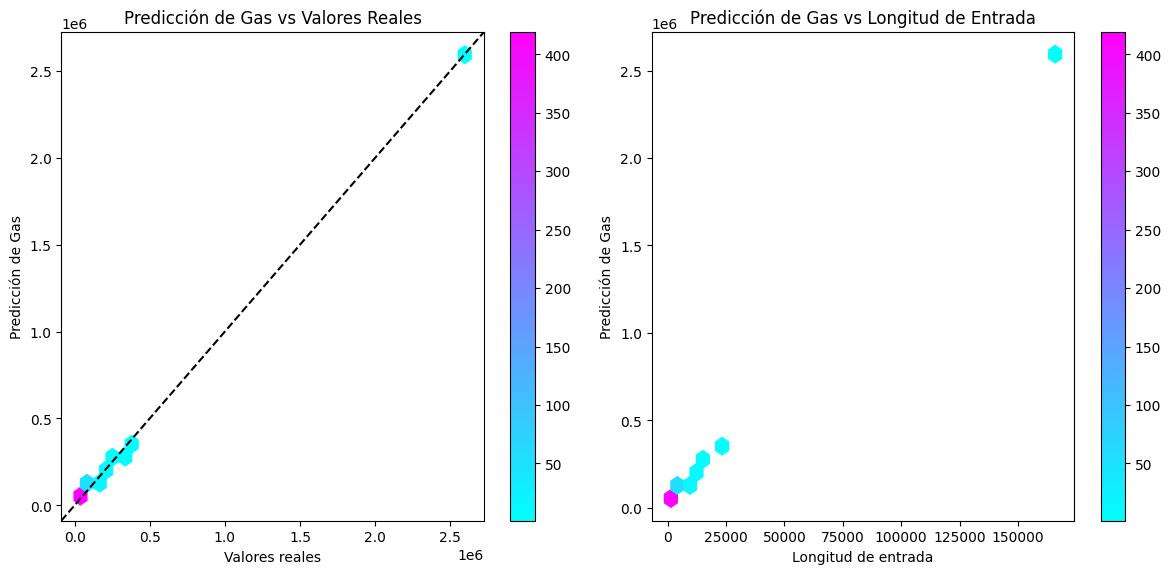

R2 = 0.9914
Pesos:
	input_len: 0.999990
	(address,address,(uint8,address,uint256,uint256,uint256),(uint8,address,uint256,uint256,uint256,address),uint8,uint256,uint256,bytes32,uint256,bytes32,uint256)[]_orders: 0.000010
-------------------------------------------------------------------
['0x1a0ad011913a150f69f6a19df447a0cfd9551054']['0xe9e05c42']


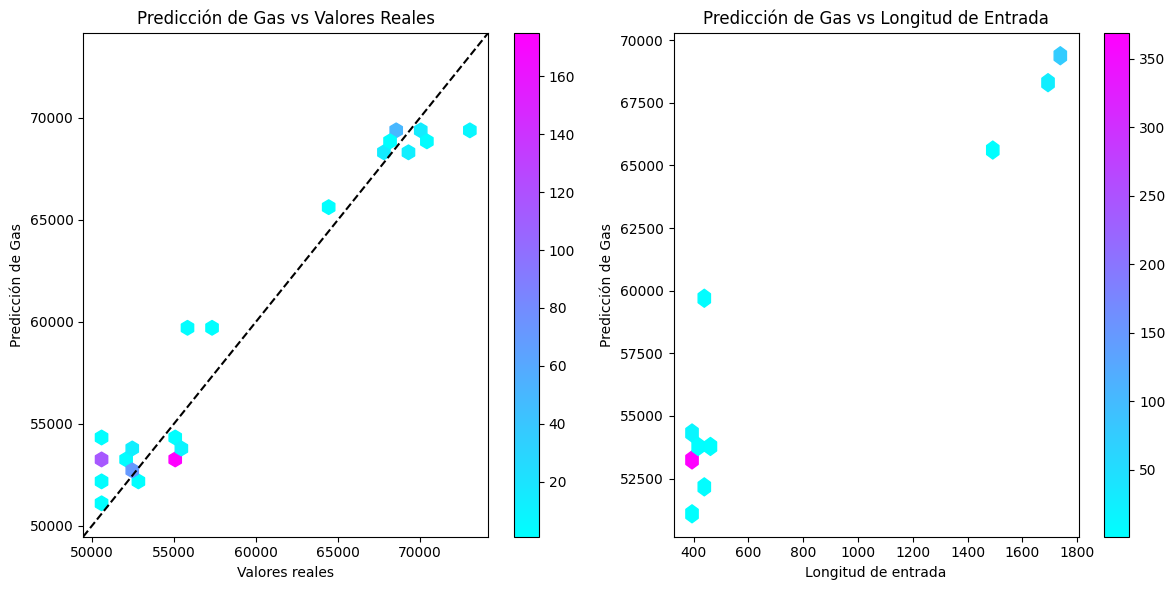

R2 = 0.9086
Pesos:
	input_len: 0.415645
	uint256__value: 0.001084
	_value_iszero: 0.000000
	uint64__gasLimit: 0.000362
	bool__isCreation: 0.000000
	bytes__data: 0.582908
-------------------------------------------------------------------
['0x00005ea00ac477b1030ce78506496e8c2de24bf5']['0x161ac21f']


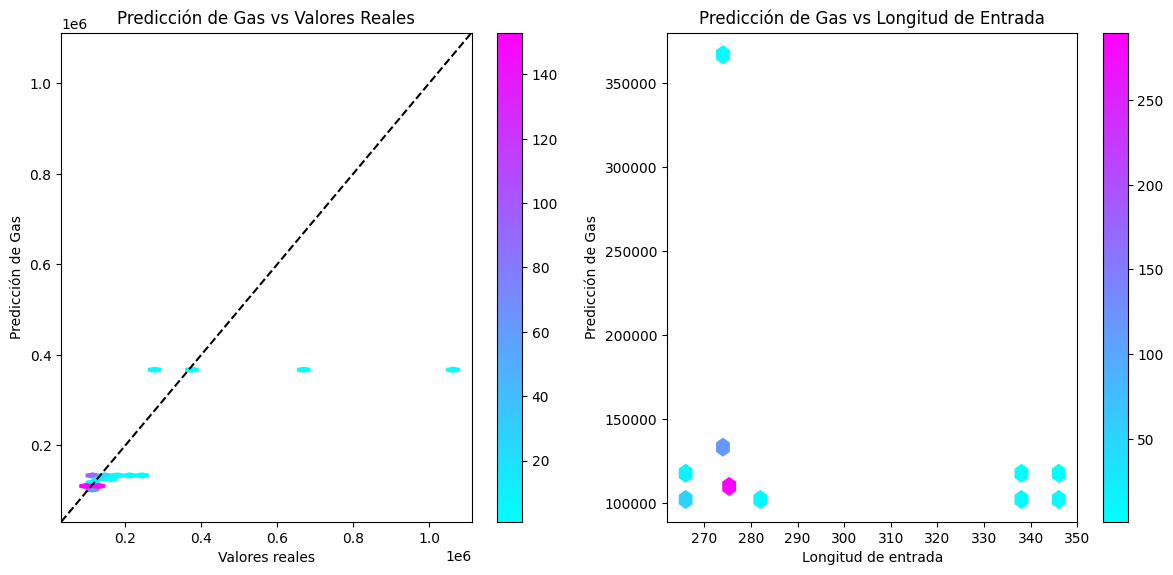

R2 = 0.8547
Pesos:
	input_len: 0.006370
	uint256_quantity: 0.993630
	quantity_iszero: 0.000000
-------------------------------------------------------------------
['0x253553366da8546fc250f225fe3d25d0c782303b']['0x74694a2b']


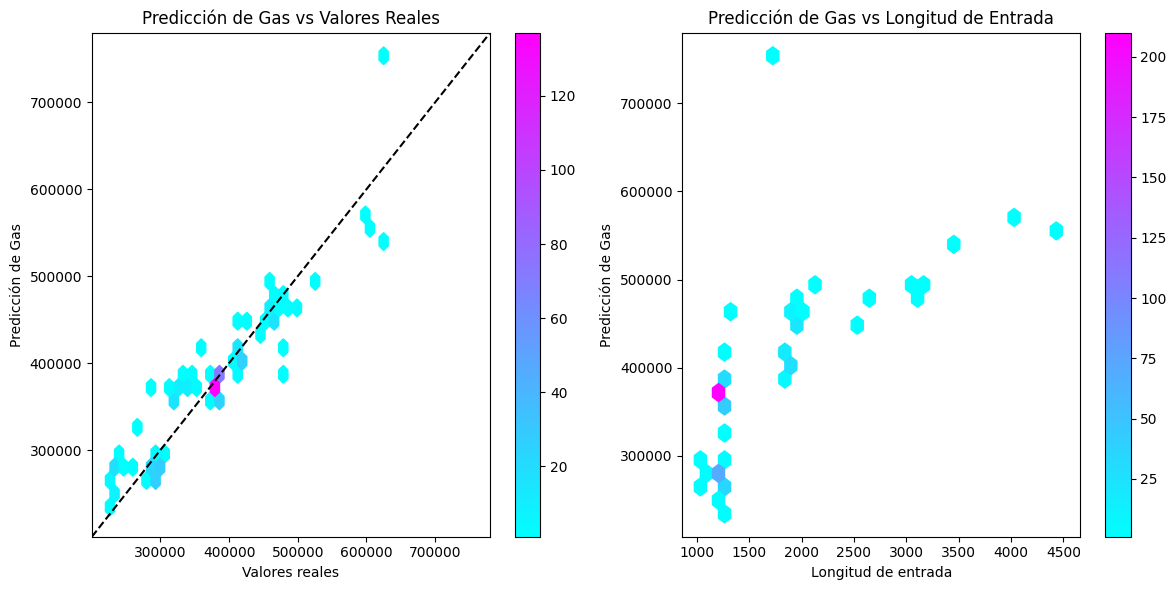

R2 = 0.8775
Pesos:
	input_len: 0.278997
	string_name: 0.043799
	uint256_duration: 0.000993
	duration_iszero: 0.000000
	bytes32_secret: 0.000645
	bytes[]_data: 0.021624
	bool_reverseRecord: 0.653941
	uint16_ownerControlledFuses: 0.000000
-------------------------------------------------------------------
['0x29469395eaf6f95920e59f858042f0e28d98a20b']['0x5e05b33c']


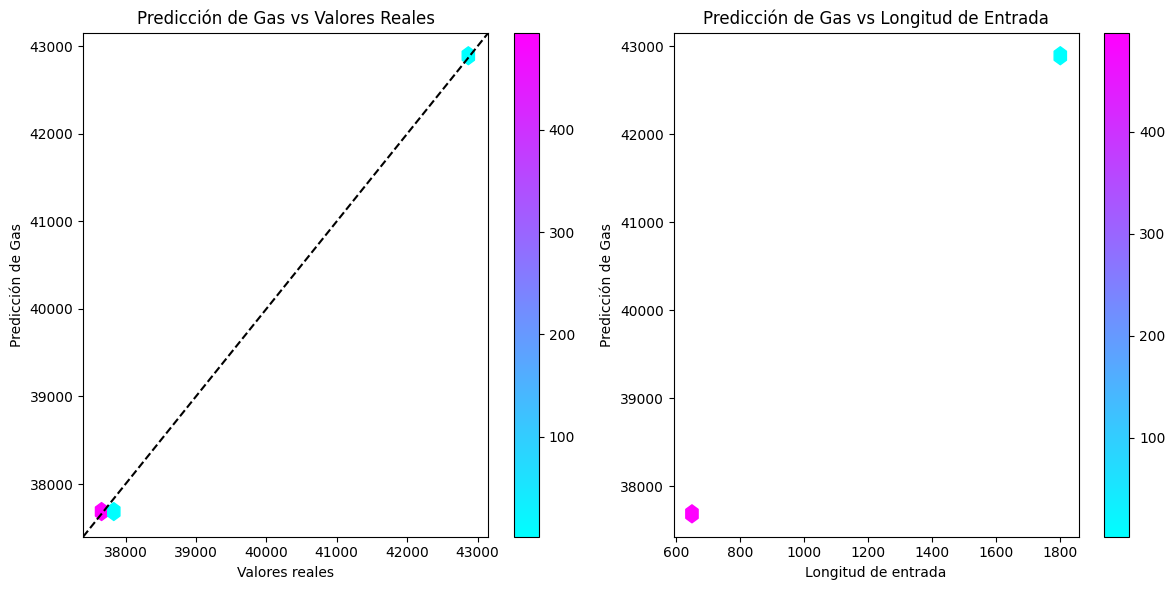

R2 = 0.9989
Pesos:
	input_len: 0.998058
	(address,address,address,uint256,uint256,uint256,uint256,uint256,uint256)_lien: 0.001794
	uint256_lienId: 0.000148
	lienId_iszero: 0.000000
-------------------------------------------------------------------
['0x1c479675ad559dc151f6ec7ed3fbf8cee79582b6']['0x8f111f3c']


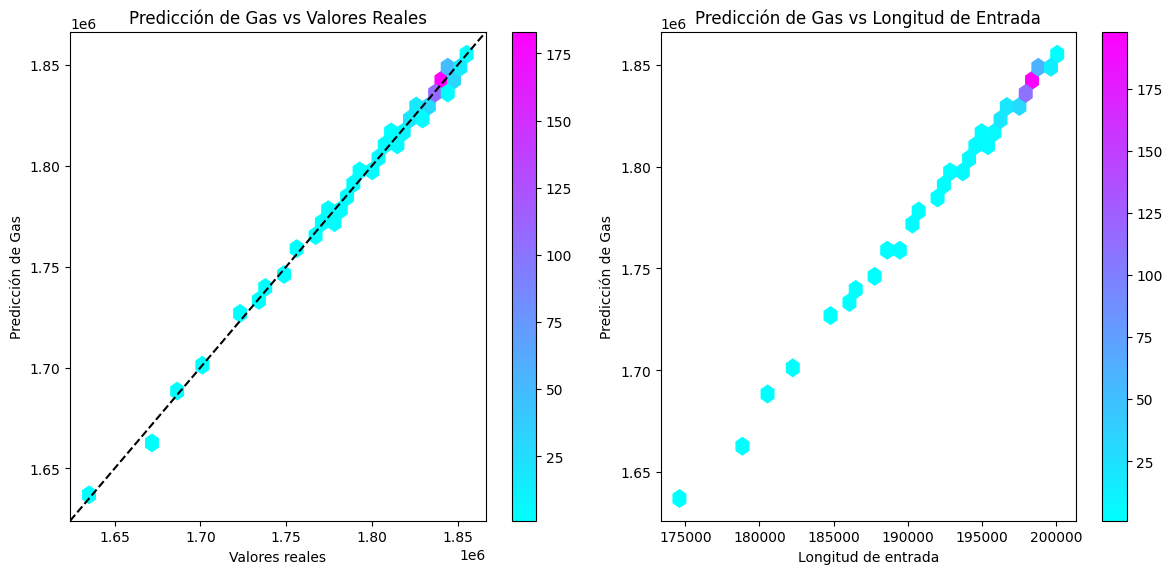

R2 = 0.9961
Pesos:
	input_len: 0.707441
	uint256_sequenceNumber: 0.000013
	sequenceNumber_iszero: 0.000000
	bytes_data: 0.292531
	uint256_afterDelayedMessagesRead: 0.000011
	afterDelayedMessagesRead_iszero: 0.000000
	uint256_prevMessageCount: 0.000003
	prevMessageCount_iszero: 0.000000
	uint256_newMessageCount: 0.000001
	newMessageCount_iszero: 0.000000
-------------------------------------------------------------------
['0xdac17f958d2ee523a2206206994597c13d831ec7']['0x095ea7b3']


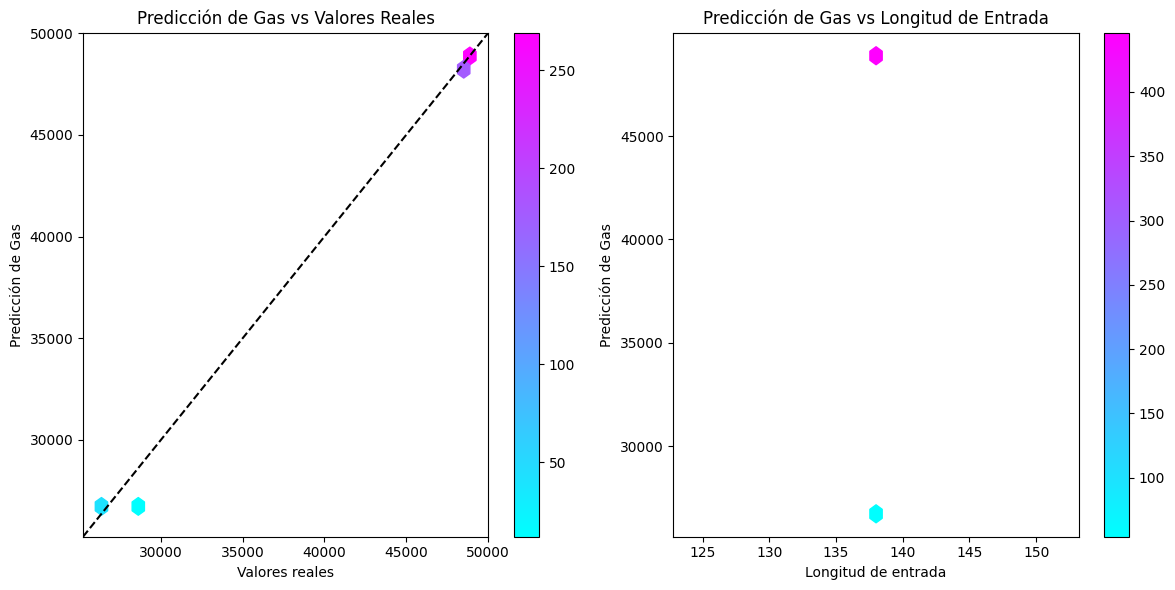

R2 = 0.9987
Pesos:
	input_len: 0.000000
	uint256__value: 0.000512
	_value_iszero: 0.999488
-------------------------------------------------------------------
['0xc662c410c0ecf747543f5ba90660f6abebd9c8c4']['0x77552641']


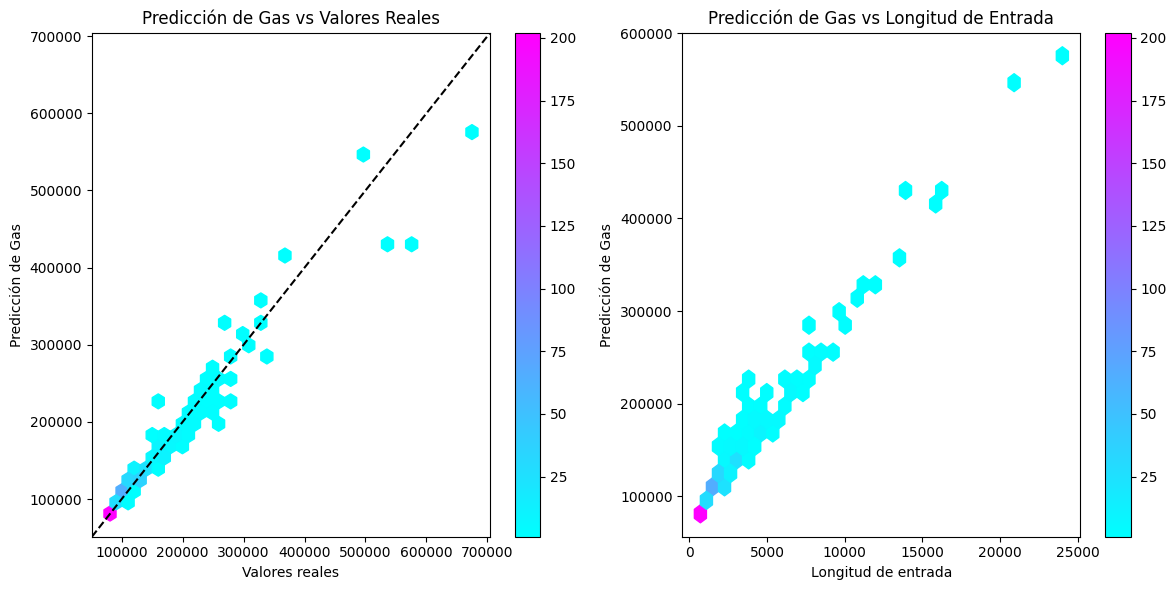

R2 = 0.9562
Pesos:
	input_len: 0.932074
	uint256[]_programOutput: 0.067631
	uint256_onchainDataHash: 0.000292
	onchainDataHash_iszero: 0.000000
	uint256_onchainDataSize: 0.000003
	onchainDataSize_iszero: 0.000000
-------------------------------------------------------------------
['0xfd14567eaf9ba941cb8c8a94eec14831ca7fd1b4']['0x5578ceae']


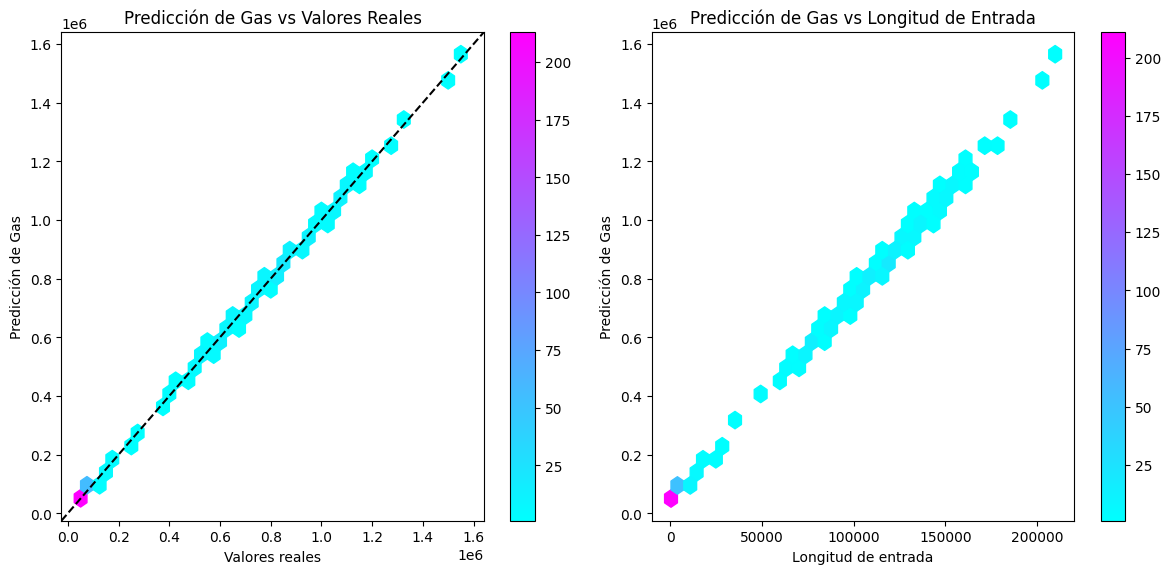

R2 = 0.9999
Pesos:
	input_len: 0.190840
	uint256_startAddr: 0.000000
	startAddr_iszero: 0.000000
	uint256[]_values: 0.809160
	uint256_z: 0.000000
	z_iszero: 0.000000
	uint256_alpha: 0.000000
	alpha_iszero: 0.000000
	uint256_prime: 0.000000
	prime_iszero: 0.000000
-------------------------------------------------------------------


In [8]:
for contract, signature in _set:
    print(f"['{contract}']['{signature}']")
    print_model_input_len(models_dict[contract][signature])
    feature_importances = models_dict[contract][signature]['GradientBoost'].model.feature_importances_
    column_names = models_dict[contract][signature]['X_test'].columns
    print(f"R2 = {models_dict[contract][signature]['GradientBoost'].r2:.4f}")
    print("Pesos:")
    for column, importance in zip(column_names, feature_importances):
        print(f"\t{column}: {importance:.6f}")
    print('-------------------------------------------------------------------')

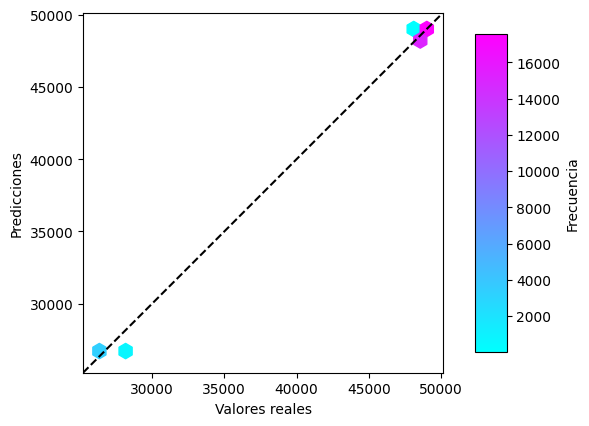

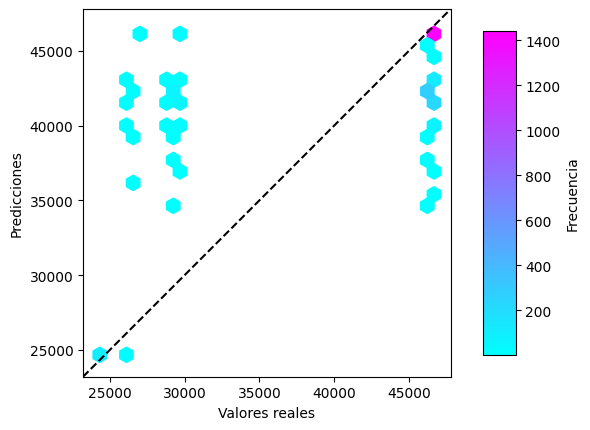

In [9]:
print_model('0xdac17f958d2ee523a2206206994597c13d831ec7', '0x095ea7b3')
print_model('0x6982508145454ce325ddbe47a25d4ec3d2311933', '0x095ea7b3')